In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [97]:
df = pd.read_csv("/Users/scharlottej13/Nextcloud/linkedin_recruiter/outputs/model_input_2021-02-03.csv")

In [99]:
log_cols = ['flow', 'distance', 'users_orig', 'users_dest', 'population_orig', 'population_dest',
            'maxgdp_orig', 'maxgdp_dest', 'area_orig', 'area_dest']
for col in log_cols:
    df[f'log{col}'] = np.log10(df[col])

In [103]:
df['prop_users_orig'] = df['users_orig'] / df['population_orig']
df['prop_users_dest'] = df['users_dest'] / df['population_dest']

In [100]:
wide_vars = pd.get_dummies(df[['iso3_orig', 'iso3_dest']], prefix=['orig', 'dest'])
wdf = df.join(wide_vars)

<AxesSubplot:xlabel='logusers_orig', ylabel='logflow'>

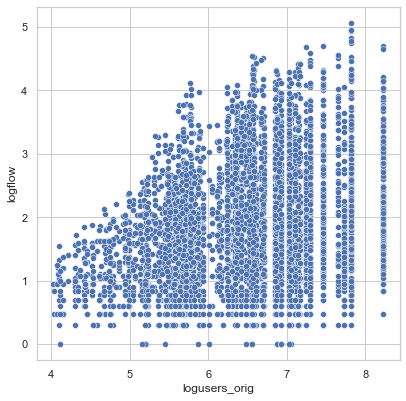

In [51]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="logusers_orig", y="logflow", data=df.query("query_date == '2020-07-25'"), ax=ax)

<AxesSubplot:xlabel='logusers_dest', ylabel='logflow'>

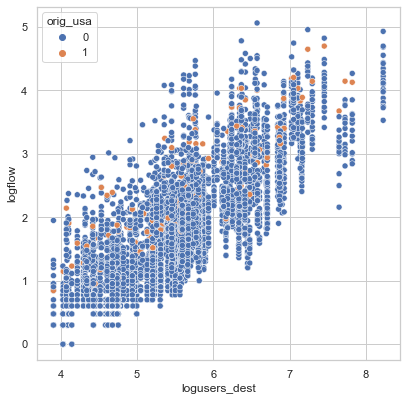

In [59]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="logusers_dest", y="logflow", data=wdf.query("query_date == '2020-07-25'"), ax=ax, hue='orig_usa')

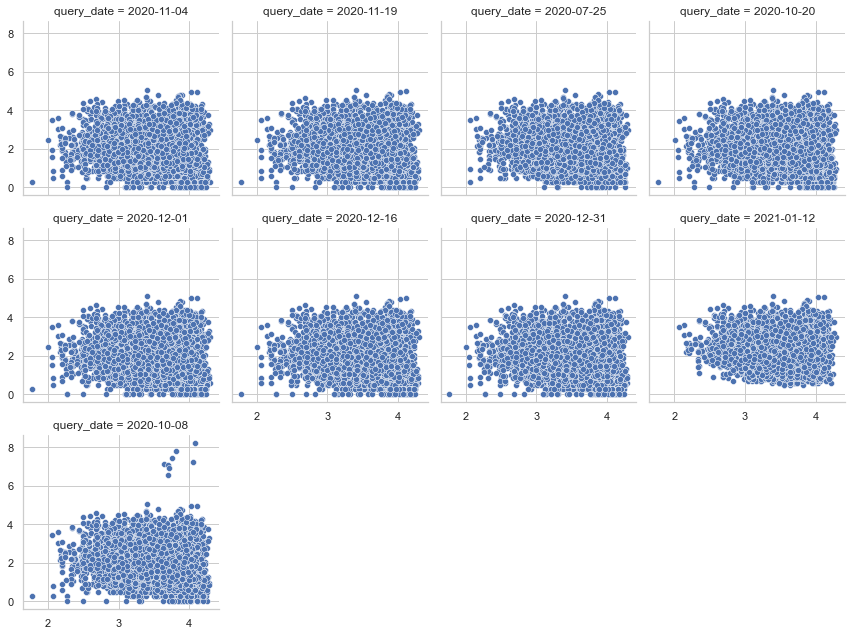

In [61]:
g = sns.FacetGrid(df, col="query_date", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="logdistance", y="logflow")

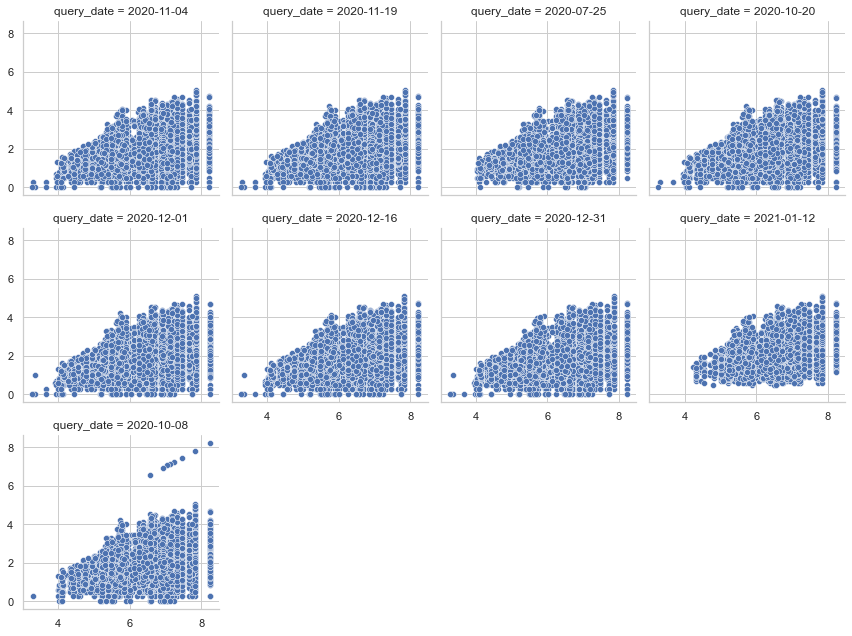

In [65]:
g = sns.FacetGrid(df, col="query_date", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="logusers_orig", y="logflow")

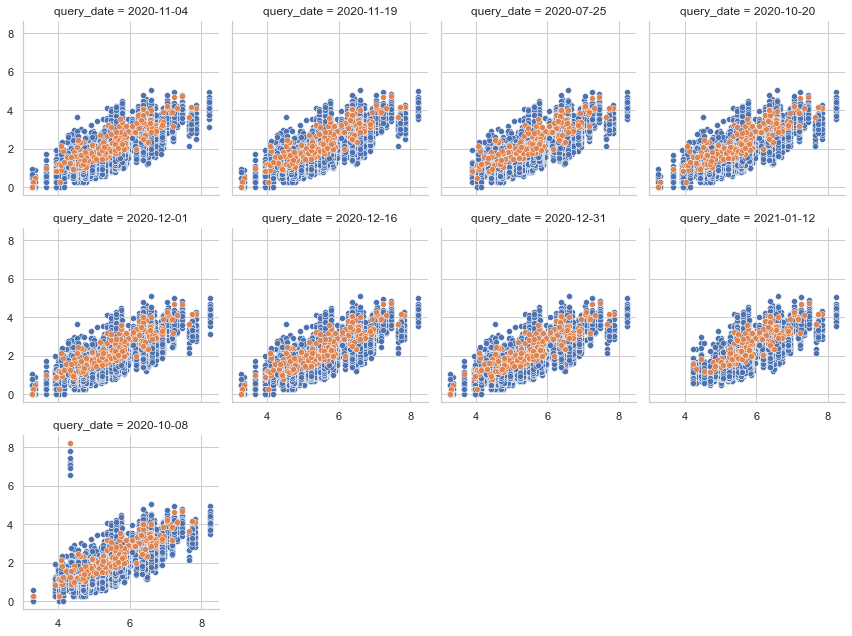

In [64]:
g = sns.FacetGrid(wdf, col="query_date", hue='orig_usa', col_wrap=4)
g.map_dataframe(sns.scatterplot, x="logusers_dest", y="logflow")

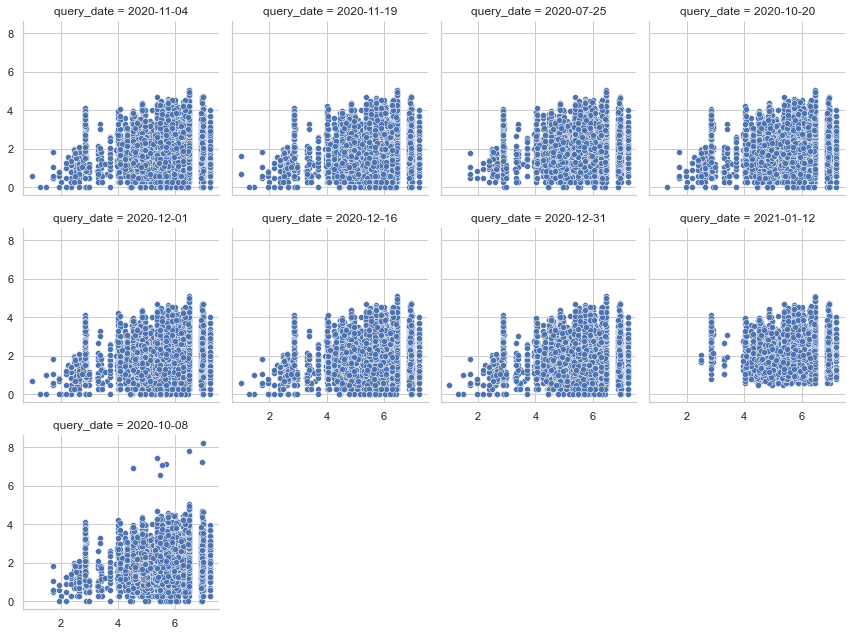

In [62]:
g = sns.FacetGrid(df, col="query_date", col_wrap=4)
g.map_dataframe(sns.scatterplot, x="logarea_orig", y="logflow")

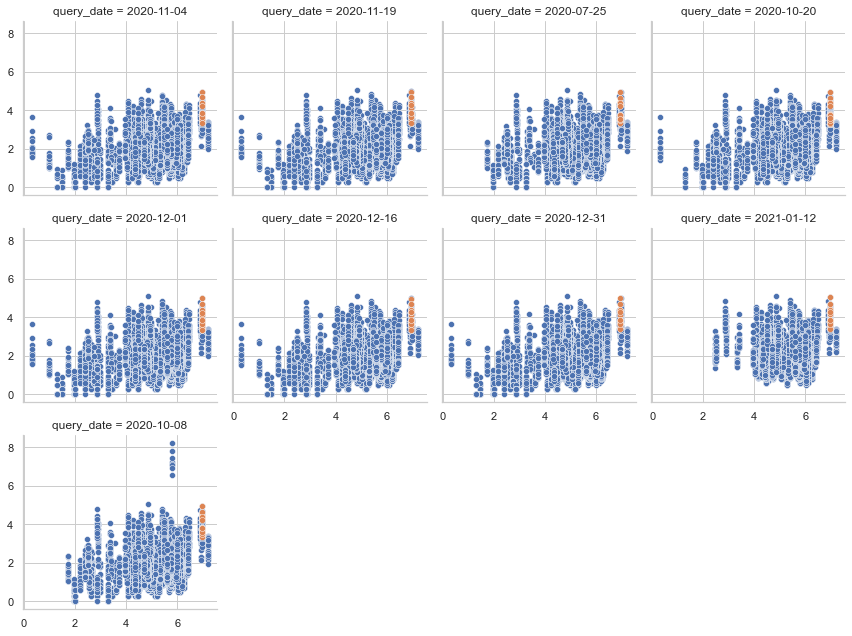

In [72]:
g = sns.FacetGrid(wdf, col="query_date", col_wrap=4, hue='dest_can')
g.map_dataframe(sns.scatterplot, x="logarea_dest", y="logflow")

<AxesSubplot:>

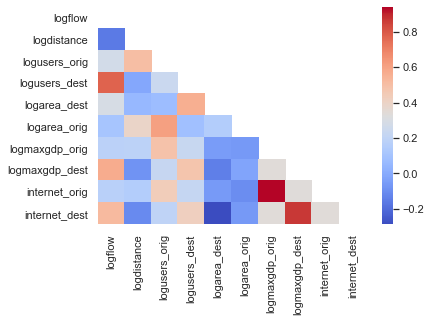

In [88]:
# are distance & number of users in origin/destination country linearly correlated?
numeric_cols = ['logflow','logdistance', 'logusers_orig', 'logusers_dest', 'logarea_dest',
                'logarea_orig', 'logmaxgdp_orig', 'logmaxgdp_dest', 'internet_orig', 'internet_dest']
matrix = np.triu(df[numeric_cols].corr())
sns.heatmap(df[numeric_cols].corr(), mask=matrix, cmap='coolwarm')

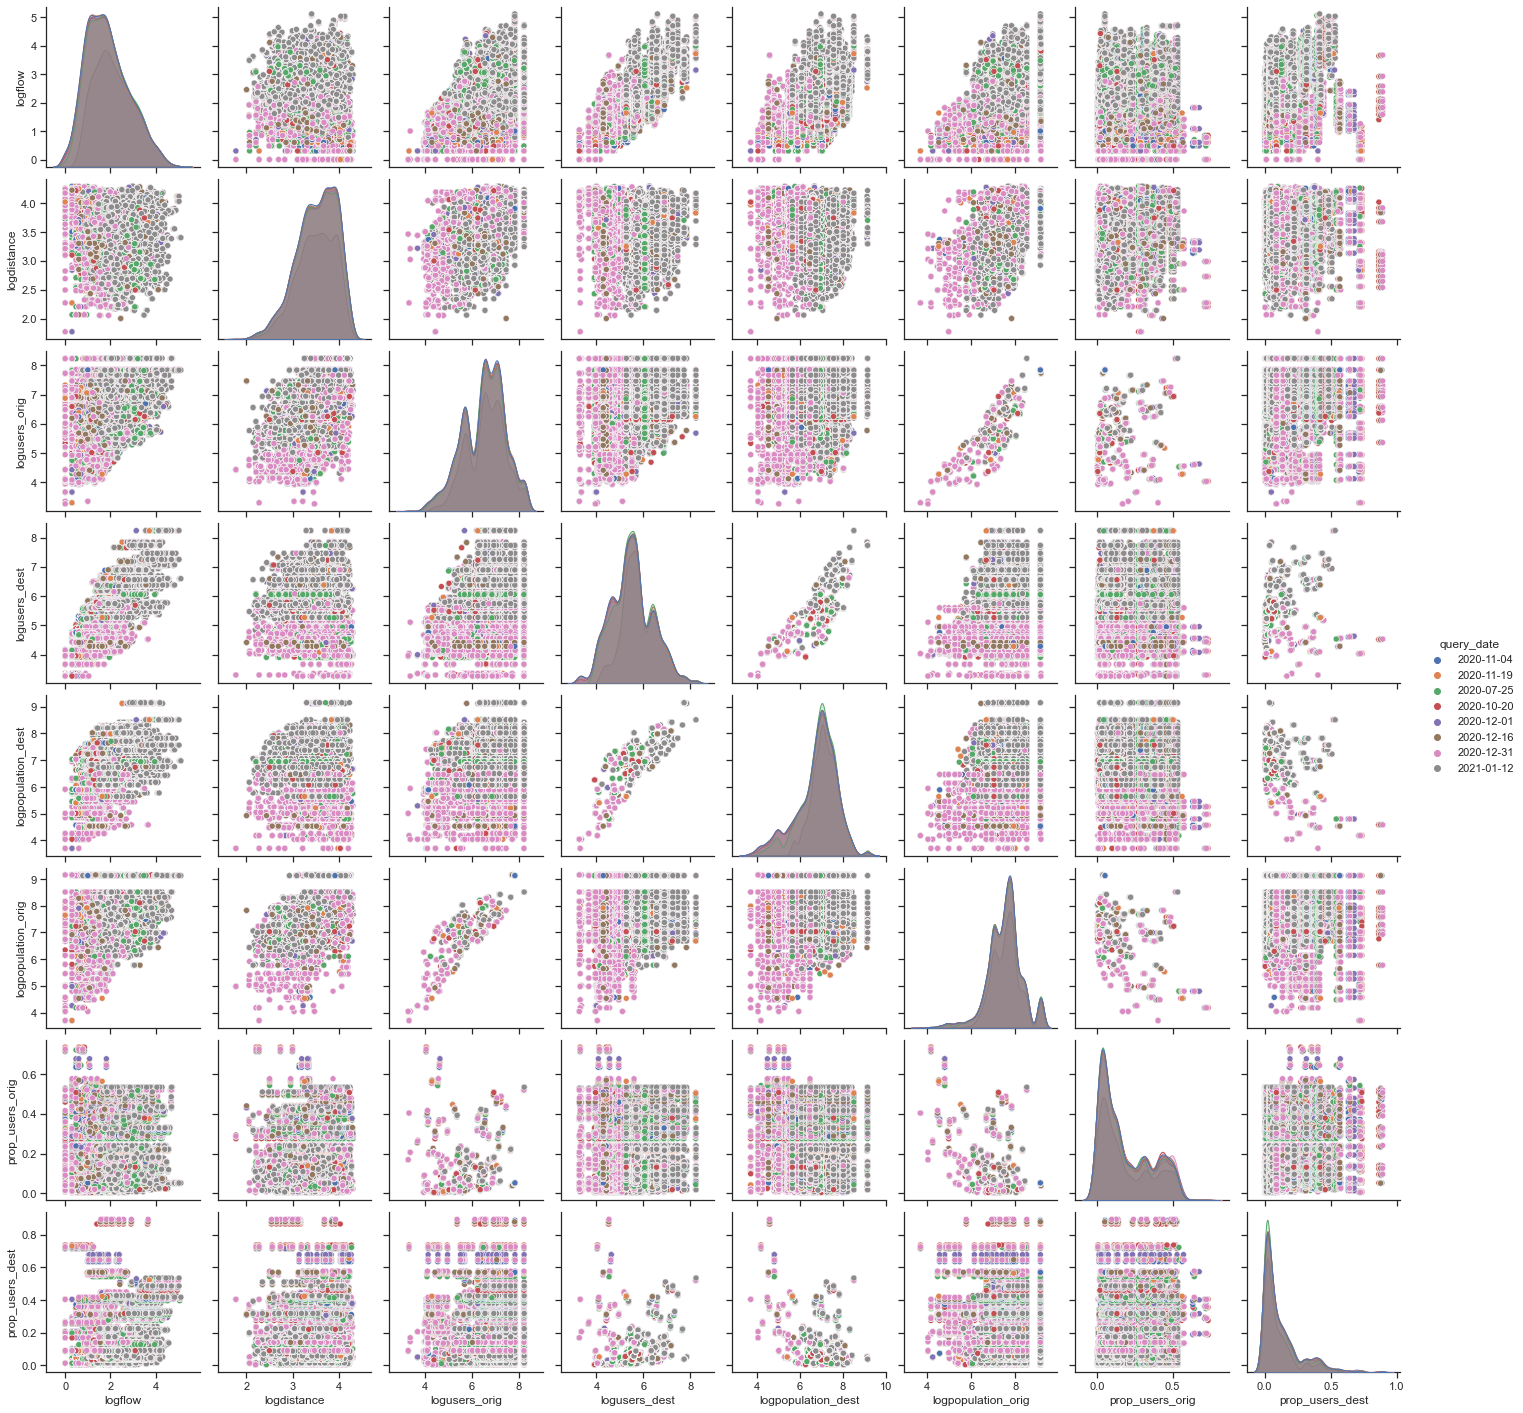

In [105]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(
    # drop oct 8th, some weird points
    df.query('query_date != "2020-10-08"'),
    vars=["logflow", "logdistance", "logusers_orig", "logusers_dest",
          "logpopulation_dest", "logpopulation_orig", "prop_users_orig", "prop_users_dest"],
    hue='query_date')
plt.show()